# EDA for Lending Data

### Analysis by: TUHINAANSHU SHEKHAR

#### Step 1 : Importing Libraries and excel file

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')

#Load 'loan.csv' input file to pandas dataframe
loan = pd.read_csv("loan.csv")

#Check whether excel is loaded or not
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### 2. Initial Insights

In [11]:
# Total entries and parameters in dataset 
loan.shape

(39717, 111)

In [12]:
# Rows 39717, Columns 111

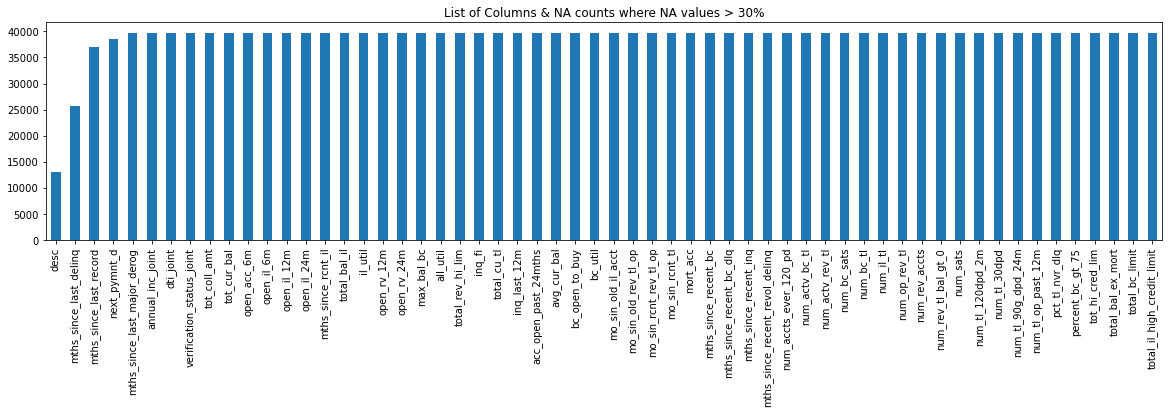

Net Columns where NA values are > 30%: 58


In [13]:
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values > 30%')
plt.show()
print("Net Columns where NA values are > 30%:", len(NA_col.index))

<font color='green'><b>Obervation:</b> From the plot it is evident that there are 58 columns have NA values in the dataset that are more than the 30% </font>

We cannot run missing value imputation for such entries, hence omitting all columns having missing value > 30%

#### 3. Data Cleaning and Manipulation


In [14]:
# removeNull(dataframe, axis, percent) drop cols/rows from dataset based on the provided parameters
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [15]:
# Remove columns where NA values are >= 30%
loan = removeNulls(loan, axis =1,percent = 0.3)
# Observation: We are now left with 53 columns

Number of Columns dropped	:  58

Old dataset rows,columns (39717, 111) 
New dataset rows,columns (39717, 53)


In [20]:
#List of columns, where unique values in only 1
unique = loan.nunique()
unique = unique[unique.values == 1]
print(unique)
print("\nNet columns with unique value counts equal to one:",len(unique.index))

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

Net columns with unique value counts equal to one: 9


In [21]:
# Remove columns where number of unique value counts is only 1
print("Old dataset rows,columns",loan.shape)
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("New dataset rows,columns",loan.shape)
# Observation: We are left with 44 columns

Old dataset rows,columns (39717, 53)
New dataset rows,columns (39717, 44)


In [22]:
# Analysze columns that are not required for analysis
print("All remaining columns in dataset: \n")
for index, col in enumerate(loan.columns, 1):
    print(index, col)

All remaining columns in dataset: 

1 id
2 member_id
3 loan_amnt
4 funded_amnt
5 funded_amnt_inv
6 term
7 int_rate
8 installment
9 grade
10 sub_grade
11 emp_title
12 emp_length
13 home_ownership
14 annual_inc
15 verification_status
16 issue_d
17 loan_status
18 url
19 purpose
20 title
21 zip_code
22 addr_state
23 dti
24 delinq_2yrs
25 earliest_cr_line
26 inq_last_6mths
27 open_acc
28 pub_rec
29 revol_bal
30 revol_util
31 total_acc
32 out_prncp
33 out_prncp_inv
34 total_pymnt
35 total_pymnt_inv
36 total_rec_prncp
37 total_rec_int
38 total_rec_late_fee
39 recoveries
40 collection_recovery_fee
41 last_pymnt_d
42 last_pymnt_amnt
43 last_credit_pull_d
44 pub_rec_bankruptcies


<font color="green"><b>Obeservation: </b>Columns that are not required for analysis are: id, member_id, url, zip_code, and title.</font><br />
1. Zipcode is removed as the last 2 digits are XX so not very accurate. 
2. Title is removed as it a categorical variable having unique value counts > 20k and is not the best metric for analysis, Purpose column serves a better representation instead.
3. Member Id and Id can't be used based on our business perspective.

In [23]:
# Remove irrelavant columns
not_required_columns = ["id","member_id","url","zip_code","title"]
print("Old dataset rows,columns",loan.shape)
loan.drop(labels = not_required_columns, axis =1, inplace=True)
print("New dataset rows,columns",loan.shape)
# Observation: We are now left with 39 columns

Old dataset rows,columns (39717, 44)
New dataset rows,columns (39717, 39)


In [25]:
# Check if all continous variables are of numeric type
loan.info()
# Observation: int_rate needs to be cast to numeric type.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [27]:
# Cleanup '%' symbol
loan["int_rate"] = loan["int_rate"].apply(lambda rate: rate.replace("%", ""))

In [29]:
# Cast continous variables to numeric
numeric_columns = ['int_rate']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [30]:
# Check no. of continous and categorial variables
print("Net continous variables:", loan.describe().shape[1])
print("Net categorical variabes:", loan.shape[1] - loan.describe().shape[1])

Net continous variables: 24
Net categorical variabes: 15


#### 4. Derived Metrics
Derive new columns based on business understanding


In [48]:
# Total recieved amount
loan['total_rec'] = loan['total_rec_prncp']+loan['total_rec_int']+loan['total_rec_late_fee']

In [55]:
# Extract year & month from Issue date
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str


Fully Paid     32756
Charged Off     5603
Name: loan_status, dtype: int64

In [56]:
# Loan status to be considered are Paid & charged off
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'].value_counts()

Fully Paid     32756
Charged Off     5603
Name: loan_status, dtype: int64

In [60]:
# Used In Heatmap
# Loan amount to Annual income ratio
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']
# Total payment funded by investors to Total Payment made ratio
loan['investor_funding_ratio'] = loan['total_pymnt_inv']/loan['total_pymnt']
# Recovary to Loan amount ratio for charged-off applicants
loan['recovary_loan_ratio'] = loan['recoveries']/loan['loan_amnt']

#### 5. Univariate Analysis
Continous Variables: Boxplot, Histogram, KDE, Violin Plot<br/>
Categorical Variables: Countplot, Barchart for Count Vs Count% metrics

In [31]:
# Function will plot graph based on parameter values
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="dark")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

In [32]:
# All continous variables
print("List of all continous variables:")
for index, col in enumerate(loan.select_dtypes(exclude=["object"]).columns,1):
    print(index, col)

List of all continous variables:
1 loan_amnt
2 funded_amnt
3 funded_amnt_inv
4 int_rate
5 installment
6 annual_inc
7 dti
8 delinq_2yrs
9 inq_last_6mths
10 open_acc
11 pub_rec
12 revol_bal
13 total_acc
14 out_prncp
15 out_prncp_inv
16 total_pymnt
17 total_pymnt_inv
18 total_rec_prncp
19 total_rec_int
20 total_rec_late_fee
21 recoveries
22 collection_recovery_fee
23 last_pymnt_amnt
24 pub_rec_bankruptcies


<font color="green"><b>Observation:</b>Based on the variables loan_amt, int_rate, installment, annual_inc, total_rec can be used for univariate analysis</font>

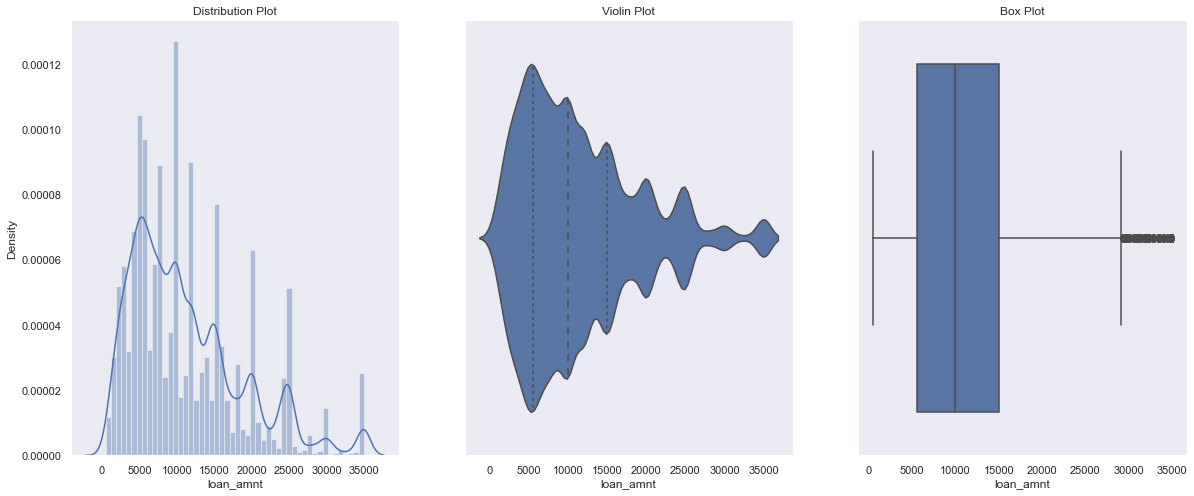

In [33]:
#Loan Amount
univariate(df=loan,col='loan_amnt',vartype=0)

<font color='green'><b>Observation:</b><br/>1. Disribution plot is positive skewed, that is very few individuals have loans in high ranges denoted by the long tail in the positive side of the diribution<br/>
2. Most loans are distributed between 5000 to 15000 USD evident from the Boxplot and Violinplot</font>

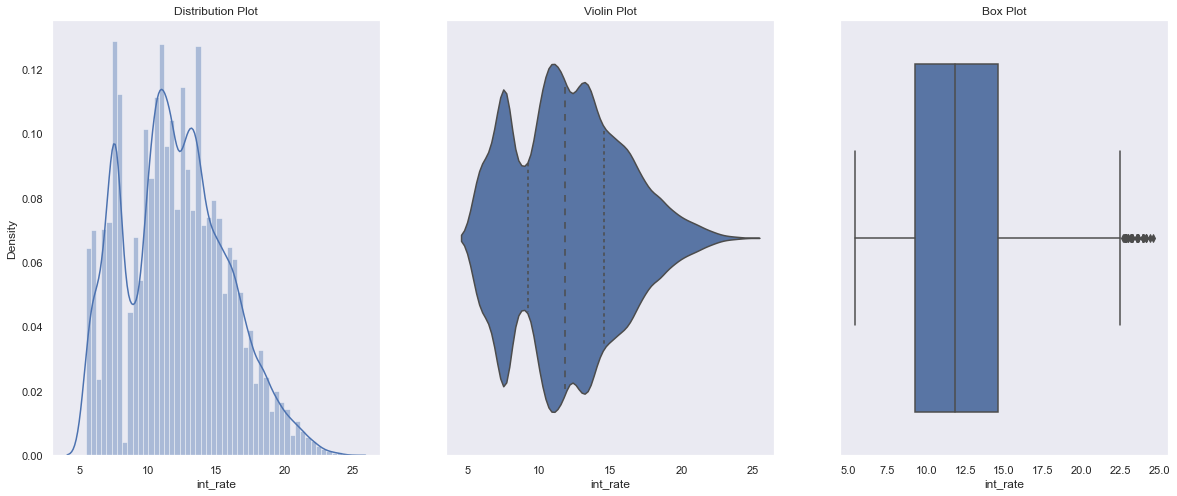

In [41]:
#Intrest Rate
univariate(df=loan,col='int_rate',vartype=0)

<font color="green"><b>Observation: </b><br/>1. Distribution plot is normally distributed and suggest that intrest rate can vary between 5% to 25%. <br/>
2. Most intrest rate range between 9.5% to 14%</font>

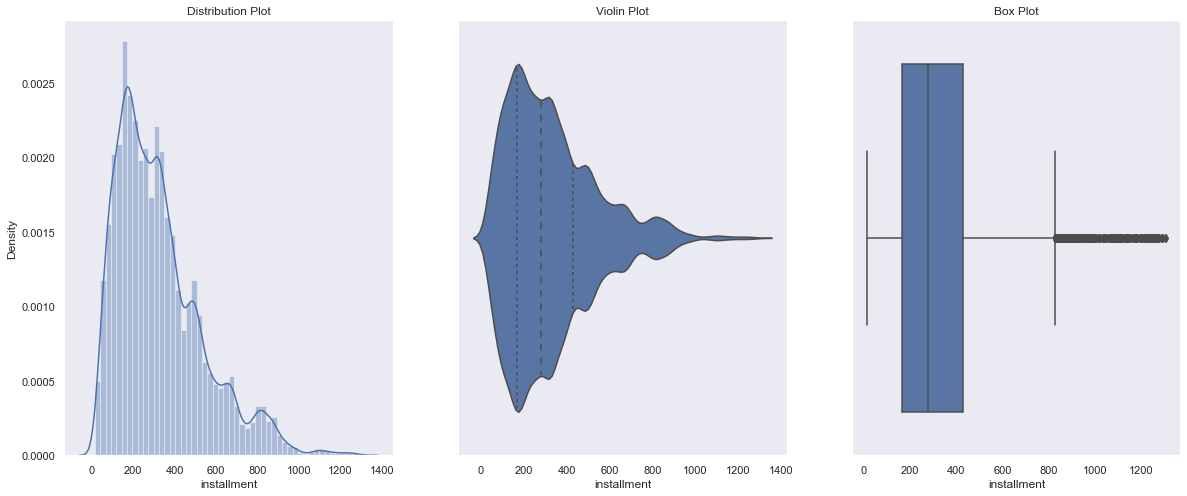

In [42]:
# Installment
univariate(df=loan,col='installment',vartype=0)

In [43]:
# Annual income
loan["annual_inc"].describe()
# Observation: Max value is 6*10^6 that is much greater than most values that are in range of 10^4
# That is 100 times that of most data.
# Therefore outlier has to be removed, for proper visulization of data

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [44]:
# Remove outlier
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

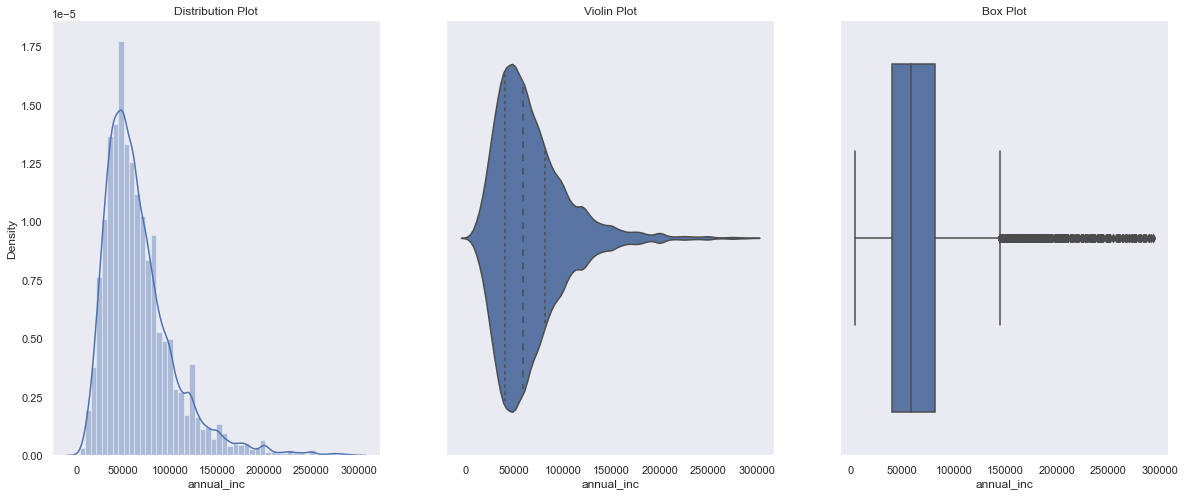

In [45]:
univariate(df=loan,col='annual_inc',vartype=0)

<font color="green"><b>Observation: </b><br/>1. Distribution plot is positively skewed suggesting very few have incomes over USD 150,000<br/>
2. Annual icome ranges from USD 40,000 to USD 80,000</font>

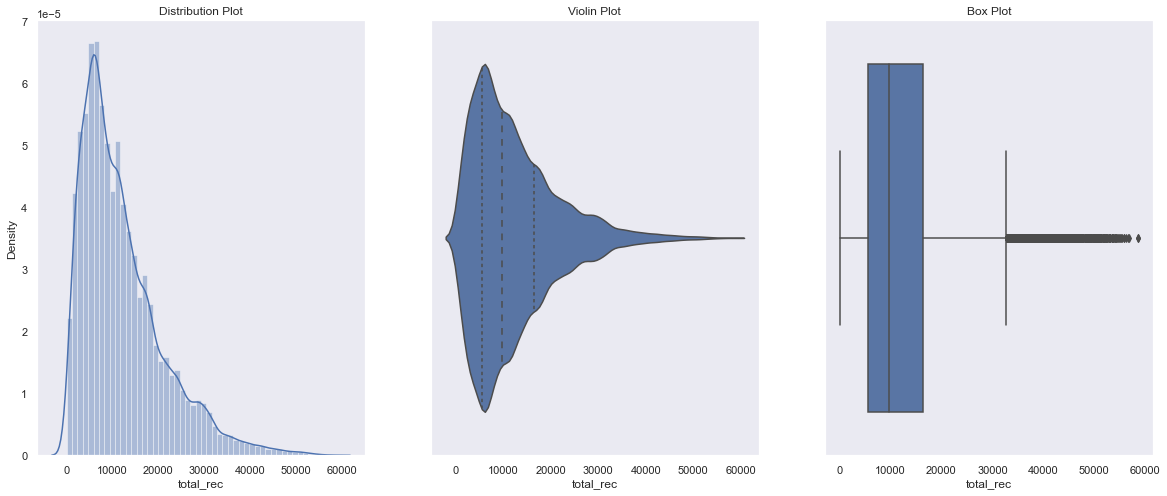

In [49]:
# Total recovary
univariate(df=loan,col='total_rec',vartype=0)

<font color="green"><b>Observation: </b><br/>1. Distribution for recovery not similar to loan amount, suggesting discrepency in recovered amount.<br/>
2. The recovery of loan ranges from USD 5000 to USD 15000, that means majority loans are recovered as evident from the plot of loan amount sanctioned</font>

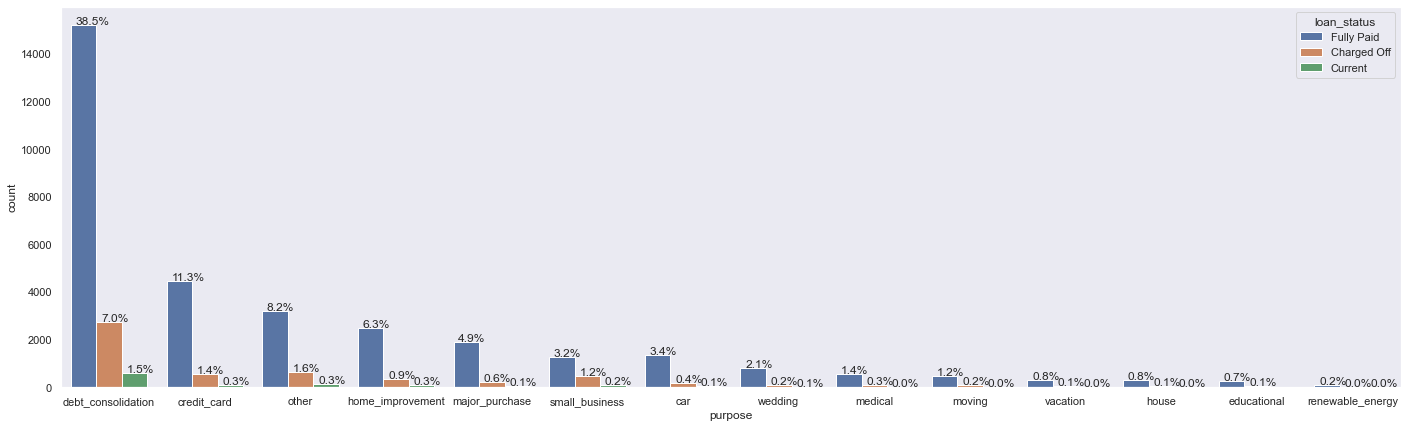

In [50]:
#Purpose of loan
univariate(df=loan,col='purpose',vartype=1,hue='loan_status')

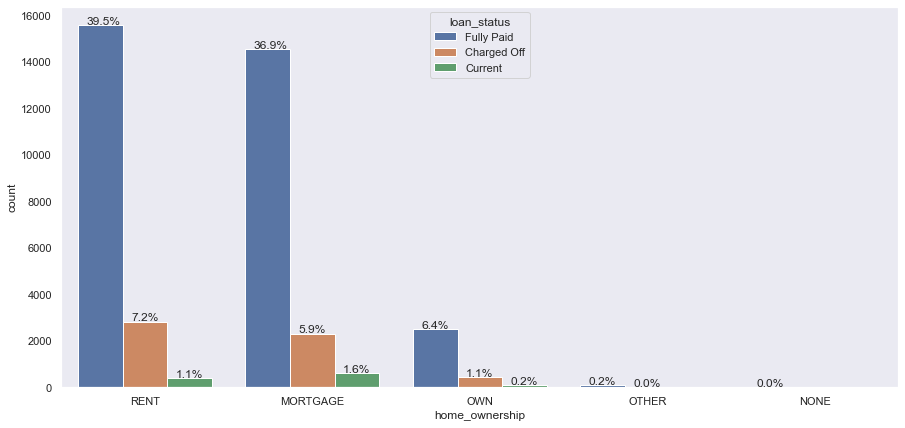

In [51]:
#Home ownership
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

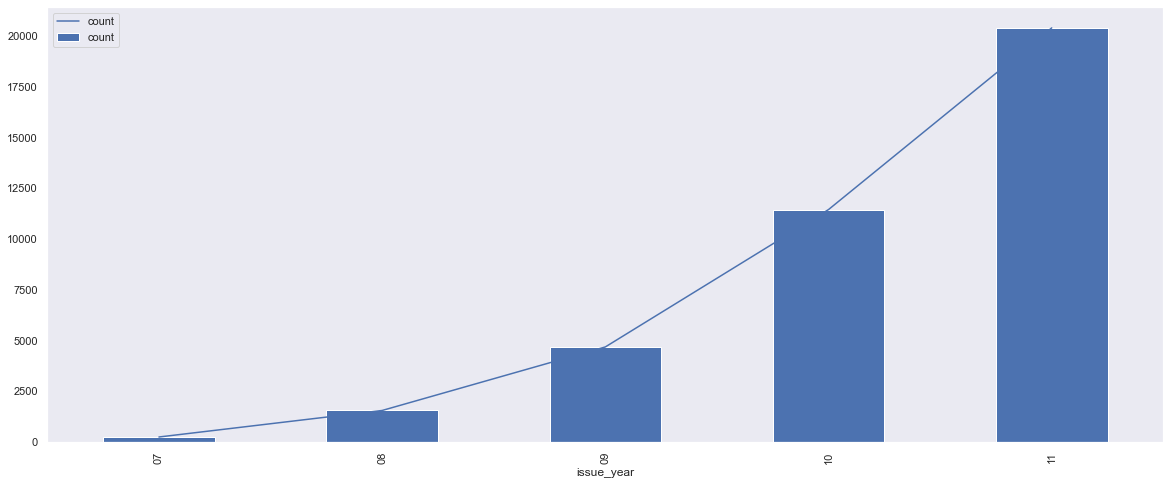

In [57]:
#Year wise analsysis
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

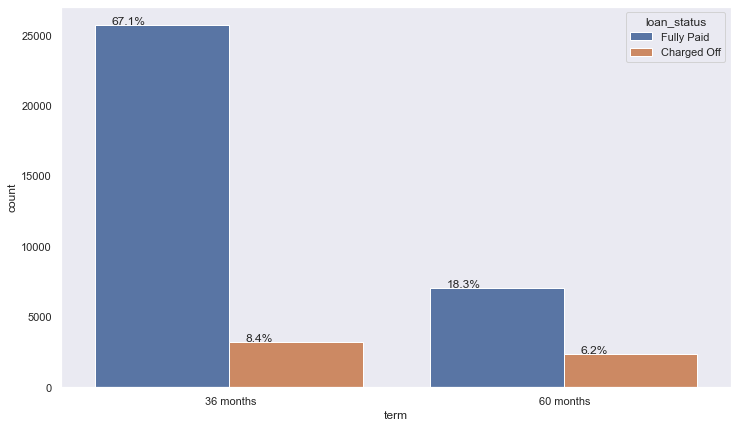

In [58]:
# Installments
univariate(df=loan,col='term',vartype=1,hue='loan_status')

<font color="green"><b>Observation: </b><br/>1) Highest no. of loans are taken from debt_consolidation, credit card bills and against home improvment</font>
<font color="green"><br/>2) Charged off loans least for those who own their own homes and comparaitively simmilar cases of Charged off loans for those who mortgage property and those who are paying rent</font>
<font color="green"><br/>3) Net no. of loans increased year on year.</font>
<font color="green"><br/>4) Maximum no. of loans(>73%) sanctioned for 36 month period</font>


#### 6. Bivariate/Multivariate Analysis
Find relationships between 2 or more variables of any cobiination of Categorial and Continous variables.
Heatmaps can be used to find relationship of this kind.

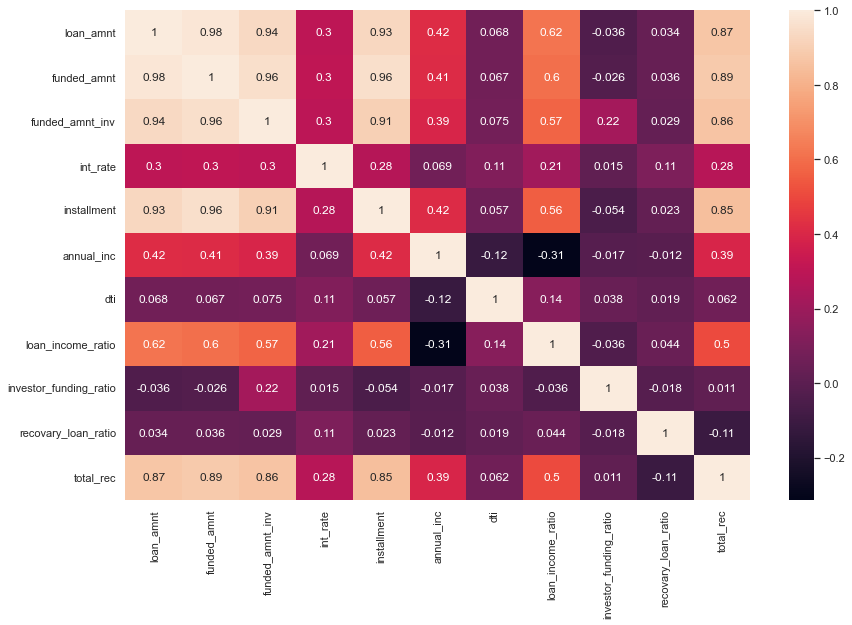

In [61]:
#Find relationships between continous variables. 
# Narrow down variables that would be effective in analysis.

#Correlation Matrix of all considered continous variables
loan_continous = loan[['loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'loan_income_ratio', 'investor_funding_ratio', 'recovary_loan_ratio', 'total_rec']]
loan_correlation = loan_continous.corr()
loan_correlation
#Heatmap of all continous variables
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

<font color="green"><b>Observation: </b>It is evident from the plot above that funded_amt, funded_amt_inv, loan_amt, installment, and total_rec have high correlation</font>

In [62]:
# crosstab function will be used to get summary table for each column
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab
# bivariate_prob function will be used to plot count% of each column, 
#stacked across loan status and probablity charged off


def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
purpose,,,,
car,160,1337,1497,0.107
credit_card,541,4466,5007,0.108
debt_consolidation,2760,15215,17975,0.154
educational,56,268,324,0.173
home_improvement,341,2483,2824,0.121
house,59,302,361,0.163
major_purchase,220,1919,2139,0.103
medical,106,571,677,0.157
moving,91,480,571,0.159


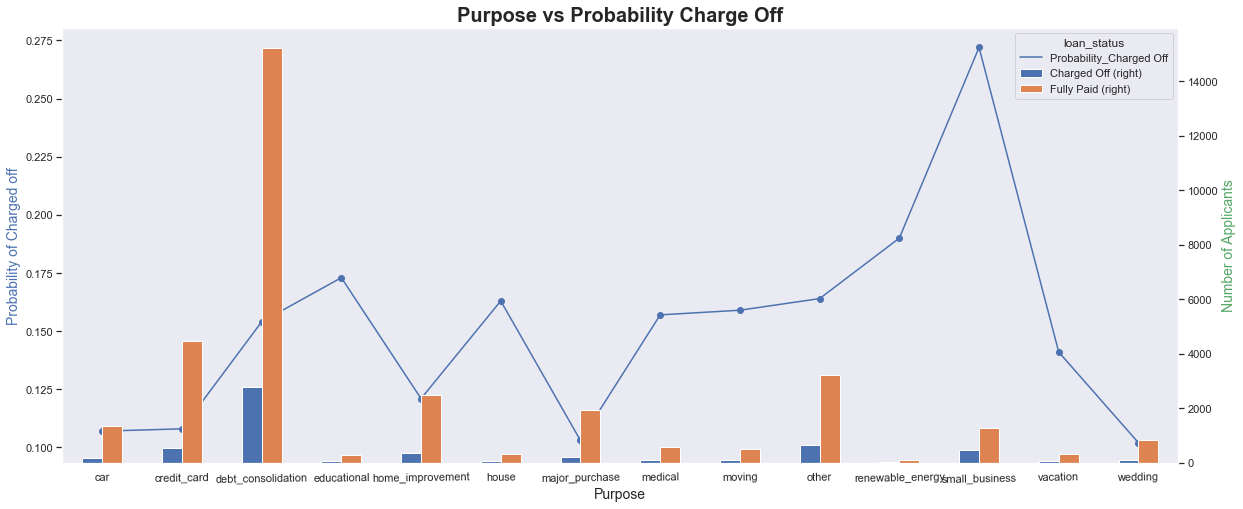

In [64]:
# Purpose VS Probability Charged off

purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
grade,,,,
A,602,9409,10011,0.060
B,1418,10204,11622,0.122
C,1342,6443,7785,0.172
D,1116,3940,5056,0.221
E,710,1920,2630,0.270
F,316,649,965,0.327
G,99,191,290,0.341


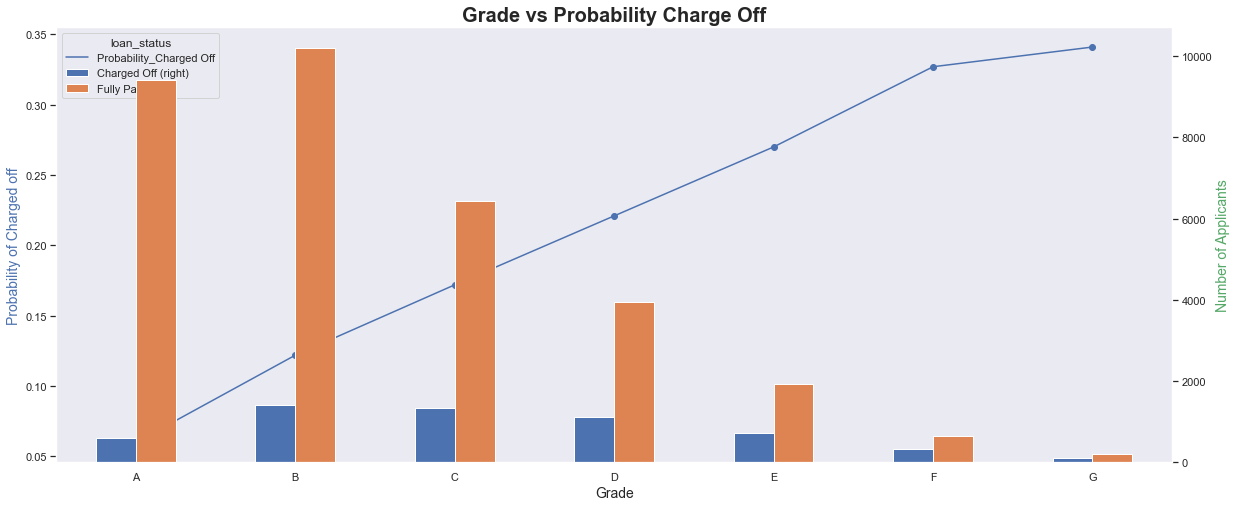

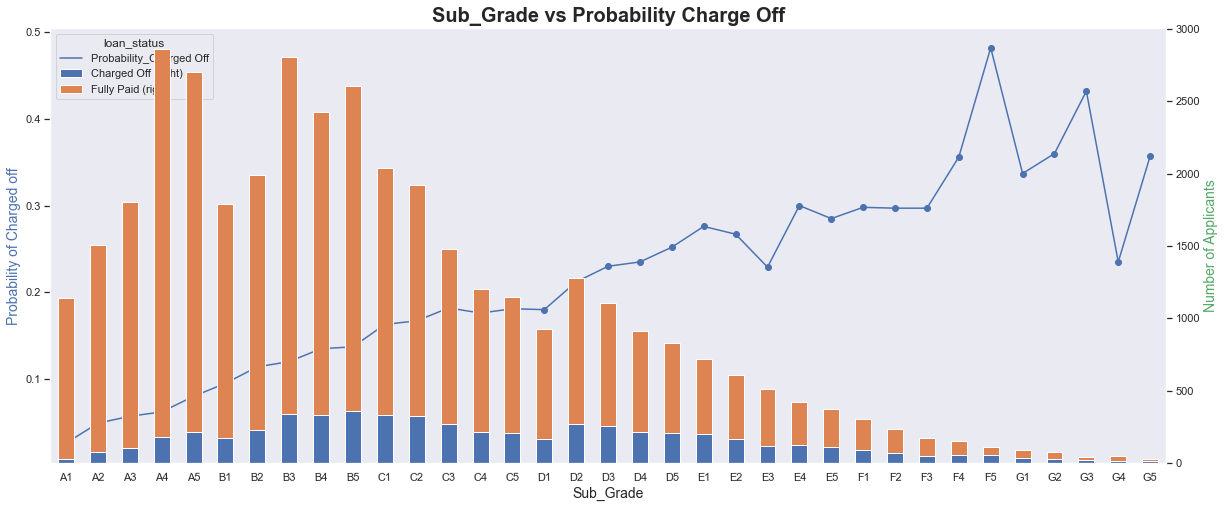

In [65]:
# Grade, Sub Grade VS Probability Charged off

grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')


loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,
"(5.419, 8.94]",584,9191,9775,0.060
"(8.94, 11.71]",1117,8343,9460,0.118
"(11.71, 14.35]",1532,8029,9561,0.160
"(14.35, 24.4]",2370,7193,9563,0.248


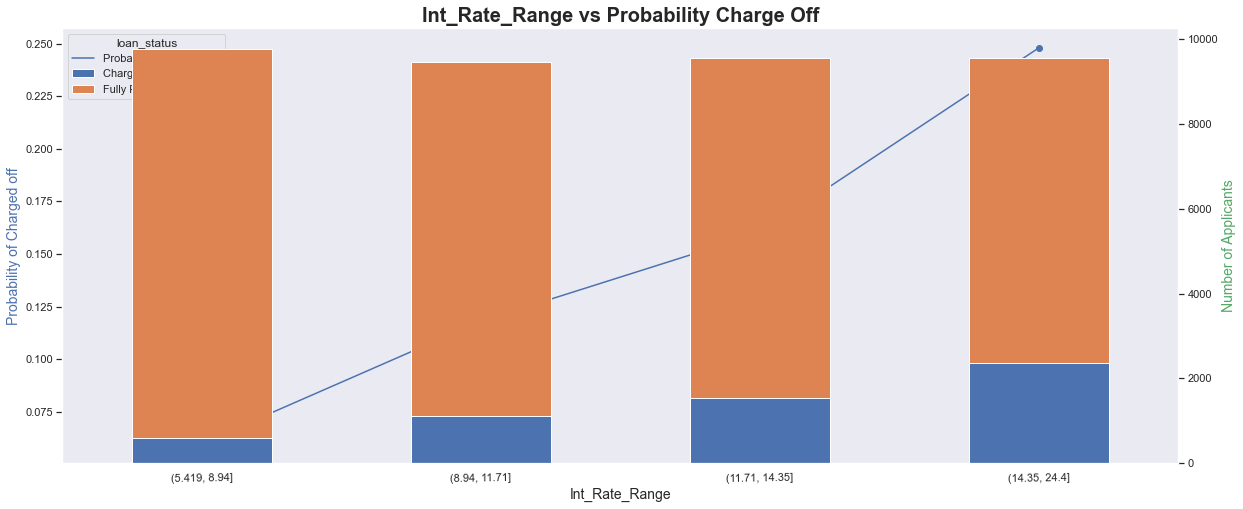

In [67]:
# Interest Rate Range VS Probability Charged off
loan['int_rate_range'] = pd.qcut(loan['int_rate'], q=4)
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')


loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
emp_length,,,,
1 year,455,2696,3151,0.144
10+ years,1322,7085,8407,0.157
2 years,565,3707,4272,0.132
3 years,553,3437,3990,0.139
4 years,458,2872,3330,0.138
5 years,457,2721,3178,0.144
6 years,305,1855,2160,0.141
7 years,262,1442,1704,0.154
8 years,203,1222,1425,0.142


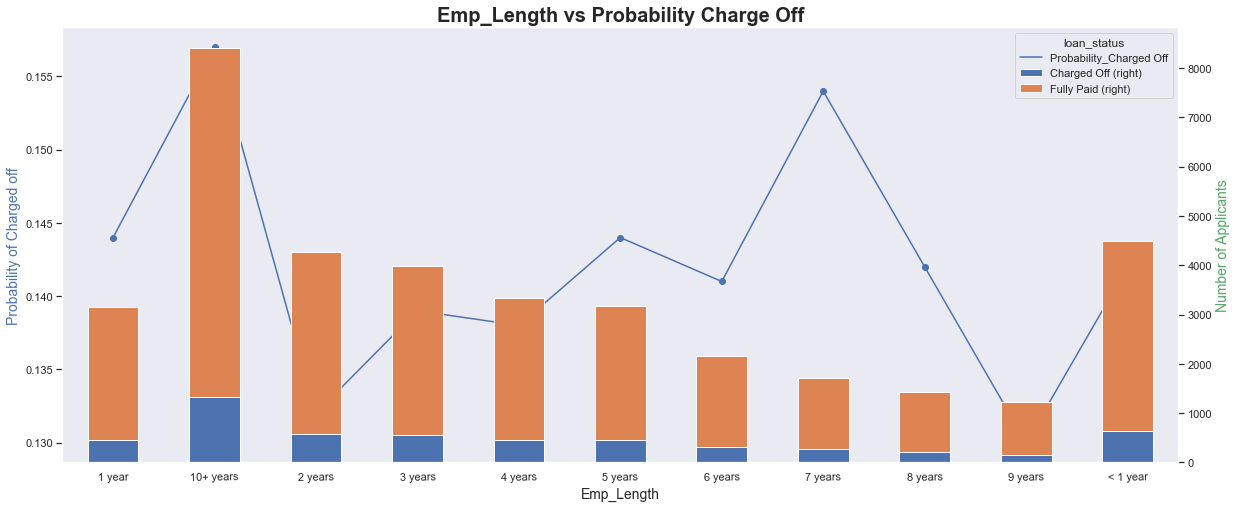

In [68]:
# Employment Rate VS Probability Charged off

emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariate_prob(df =loan,col ='emp_length')

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,
"(3999.999, 40000.0]",1751,7947,9698,0.181
"(40000.0, 58000.0]",1420,8080,9500,0.149
"(58000.0, 81000.0]",1358,8219,9577,0.142
"(81000.0, 294000.0]",1074,8510,9584,0.112


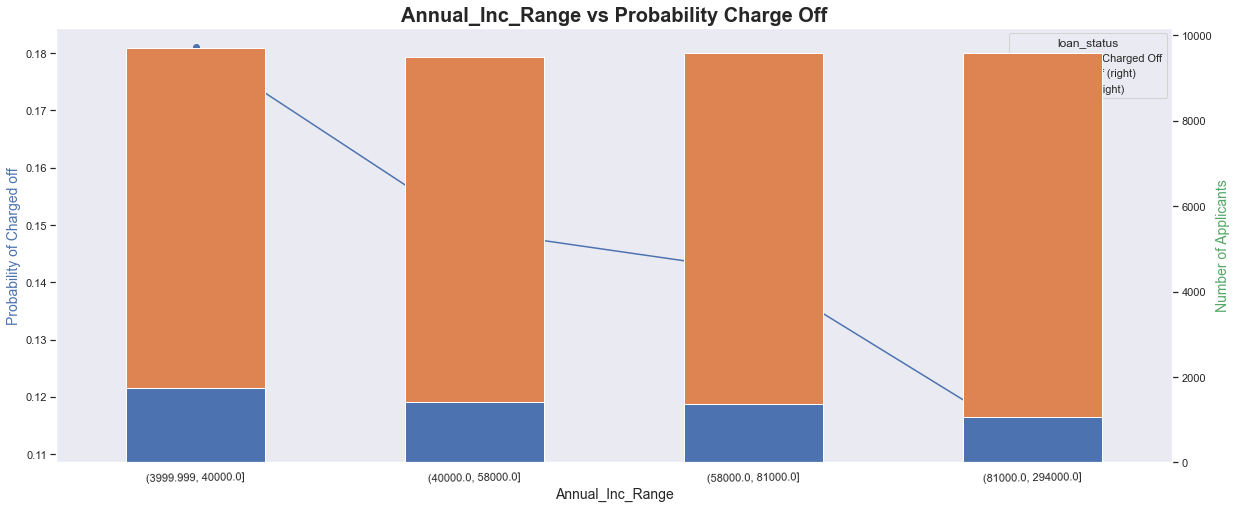

In [70]:
# Annual Income Range VS Probability Charged off
loan['annual_inc_range'] = pd.qcut(loan['annual_inc'], q=4)
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range')

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
installment_range,,,,
"(15.689, 165.595]",1333,8257,9590,0.139
"(165.595, 276.98]",1304,8288,9592,0.136
"(276.98, 423.61]",1403,8185,9588,0.146
"(423.61, 1305.19]",1563,8026,9589,0.163


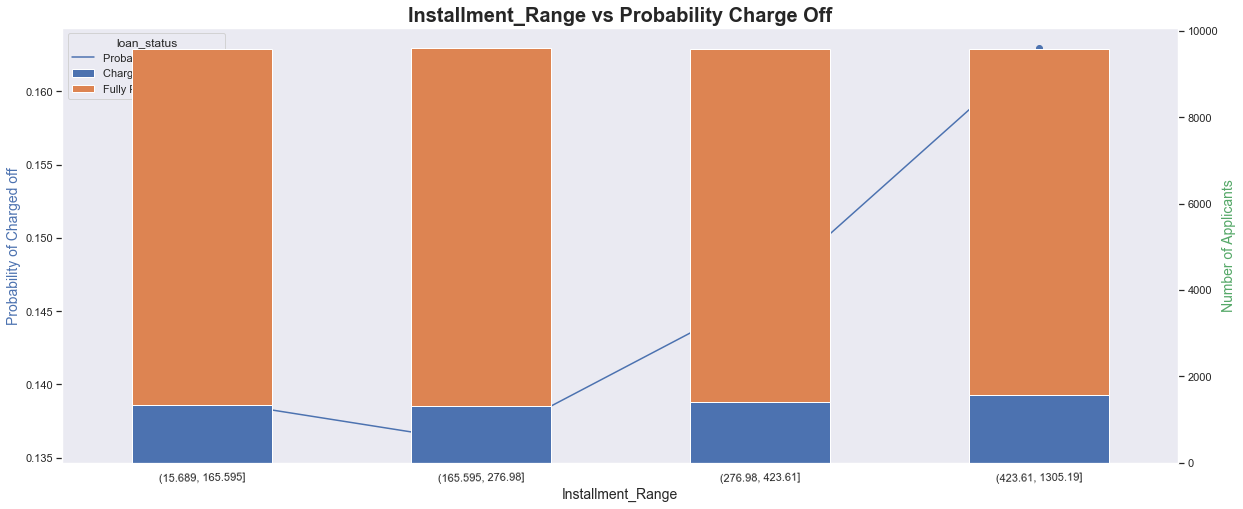

In [72]:
# Installment Range VS Probability Charged off
loan['installment_range'] = pd.qcut(loan['installment'], q=4)
installment_range = crosstab(loan,'installment_range')
display(installment_range)

bivariate_prob(df =loan,col ='installment_range')

<font color="green"><b>Observation: </b>Charge off highest(27.2%) for loans taken against Small businesses</font>
<font color="green"><br />1. Charge of highest for Grade F(32.7%) and Grade G(34.1%)
    <br/>2. The second plot shows the detailed plot of Charge off probability based on sub grades</font>
<font color="green">Charge off highest(25.1%) for interest rate ranges in the highest bracket [14,59%, 24.59%]</font>
<font color="green">Charge off highest for professionals with 10+ years experience(15.7%) and those with 7 year experience(15.4%)</font>
<font color="green">Charge Off highest(18%) for the lowest bracket of Income range ie[4000, 40400]</font>
<font color="green">Charge off highest(16.4%) for installments > USD 430</font>

##### Major Variables for loan default prediction are:
<font color="Red"><b>
<br/>1. funded_amt <br/>2. funded_amt_inv<br/>3. loan_amt <br/> 4. installment <br/> 5.total_rec <br/> 6. Addr_state <br/> 7. purpose <br/> 8. Grade/Sub-Grade <br/>9. annual_inc_range <br/> 10.int_rate_range<br/> 11. emp_length <br/> 12. installment_range</b></font>